Supervised learning

Criando os dados

In [1]:
# Importando bibliotecas
import numpy as np # Usado para operações com arrays e matemática numérica
import matplotlib.pyplot as plt # Criar gráficos

# Definindo estilo dos gráficos
plt.style.use("fivethirtyeight")  # Aplica o estilo visual "fivethirtyeight" aos gráficos criados com matplotlib

# Importando a função para gerar dados de classificação
from sklearn.datasets import make_classification # Importa a função make_classification da biblioteca scikit-learn.
# Essa função serve para gerar datasets sintéticos de classificação supervisionada, ou seja, 
# conjuntos de dados artificiais que podem ser usados para treinar/testar modelos de classificação.

# Gerando os dados
X, y = make_classification(
    n_samples=200, # Quantidade de linhas (dados) da matriz X
    n_features=2,  # Cada amostra terá duas variáveis
    n_redundant=0, # Nenhuma variiável será correlacionada
    n_informative=2,  # Ambas as variáveis serão relevantes para determinar a classe
    random_state=271828, # Semente de aleatoriedade
)  

# Visualizando as primeiras amostras
X[:10], y[:10] # Mostr as 10 primeiras linhas de x e os 10 primeiros rótulos

(array([[-0.82957966, -1.22847062],
        [ 0.5525565 ,  0.20709616],
        [-0.84838344, -1.7094548 ],
        [-0.78383162,  1.34462379],
        [ 0.49030516, -0.49824476],
        [ 2.17472504, -2.45208968],
        [-0.50289622,  0.98228559],
        [ 0.61598332,  0.44858769],
        [ 1.27561955, -1.24752018],
        [-0.36286717, -2.89752   ]]),
 array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0]))

Analisando-os em um gráfico

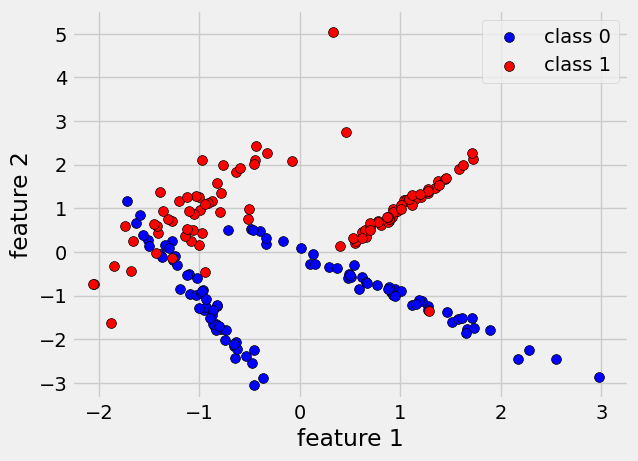

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Criar o gráfico de dispersão
plt.scatter( 
    X[y == 0, 0], # Para a primeira feature, exibir os pontos que a label é 0
    X[y == 0, 1], # Para a segunda feature, exibir os pontos em que a label é 0
    marker="o", # Forma dos pontos
    c="b", # Cor azul
    s=50, # Tamanho dos pontos
    edgecolor="k", # Contorno preto nos pontos
    label="class 0" # Legenda
)
plt.scatter(
    X[y == 1, 0], # Para a primeira feature, exibir os pontos que a label é 1
    X[y == 1, 1], # Para a segunda feature, exibir os pontos que a label é 1
    marker="o", # Forma dos pontos
    c="r", # Cor vermelha
    s=50, # Tamanho dos pontos
    edgecolor="k", # Contorno preto nos pontos
    label="class 1" # Legenda
)

# Set x limits
plt.xlim(min(X[:, 0]) * 1.1, max(X[:, 0]) * 1.1) # Pega o mínimo e máximo da primeira feature (X[:, 0])
# e aplica um fator multiplicativo 1.1 para dar um pouco de margem visual.

# Set y limits
plt.ylim(min(X[:, 1]) * 1.1, max(X[:, 1]) * 1.1)

# Add labels
plt.xlabel("feature 1")
plt.ylabel("feature 2")

# Add legend - Use the classes from y
plt.legend()

# Display the plot
plt.show()

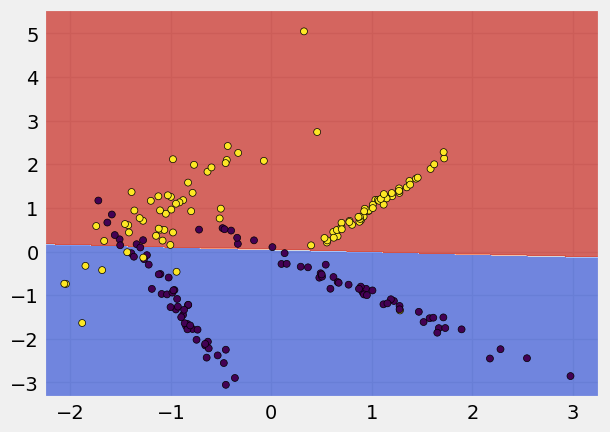

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=271828) # Cria uma variável para armazenar uma regressão logística, linear, classificação binária


clf.fit(X, y) # Treina o modelo usando os dados x,y
# A regressão ajusta uma linha que separa as duas classes

# Criando uma grid para visualizar o espaço de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Fronteiras em X
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Fronteiras em Y
h = 0.02  # Passo da grid
xx, yy = np.meshgrid( # Transforma dois vetores 1D em duas matrizes 2D
    np.arange(x_min, x_max, h), # Sequência de valores no eixo X, de x_min até x_max, com passo h
    np.arange(y_min, y_max, h)  # Sequência de valores no eixo y, de y_min até y_max, com passo h
                    )

# Classificando todos os pontos da malha
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Usa o modelo clf para classificar cada ponto na grid
Z = Z.reshape(xx.shape) # Z vira uma matriz 2D com as classes previstas

# Preenche o fundo da grid com as cores desejadas de acordo com a classificação Z
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plota os pontos
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

# Limites em X
plt.xlim(min(X[:, 0]) * 1.1, max(X[:, 0]) * 1.1)

# Limites em y
plt.ylim(min(X[:, 1]) * 1.1, max(X[:, 1]) * 1.1)

plt.show()




In [4]:
# Visualizando a acurácia do modelo
accuracy = clf.score(X, y) # Accuracy recebe a porcentágem de acerto do modelo com base nos vetores X e Y
print(f"Accuracy: {accuracy*100:.2f} %")

Accuracy: 87.50 %


Unsupervised learning

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs( # Generate 'fake data' for clustering algorithms
    n_samples = 300,
    n_features = 10,
    centers = 3,
    cluster_std = 0.5,
    random_state = 271828,
)

X[:10], y[:10]



(array([[  7.35163853,  -0.49283395,  10.51622071,  -7.86872586,
          -6.63787354,   3.88197023,   1.77028372,  -2.33607515,
           8.15300352,   4.59302812],
        [  8.50780938,   6.68435184,  -8.37122403,   2.11221295,
           0.08518786,   9.70138732,  -3.62071403,   4.73539095,
         -10.35856258,   2.10891206],
        [ -1.81169425,   2.89756472,  -7.68268025,  -2.01150423,
           1.43613557,  -3.73950242,  -5.10297689,  -9.81252376,
          -4.49579273,   6.00911584],
        [ 10.45660563,   6.82732801,  -8.19189755,   1.59269493,
          -1.77137894,   9.08605043,  -3.66312981,   5.46878994,
          -9.11502105,   1.54110838],
        [  7.76350899,   0.20518448,   9.47776073,  -8.81189036,
          -6.10342249,   3.08537241,   0.63796895,  -2.37474588,
           9.4515505 ,   3.69817421],
        [  9.71592063,   6.41570306,  -8.26557689,   3.0278186 ,
          -1.75481352,   8.84921426,  -3.7427773 ,   5.30639511,
          -9.35099518,   1.621

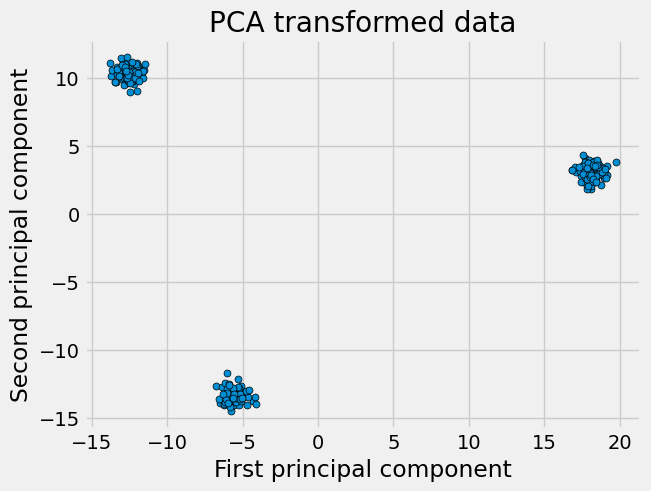

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # Used to reduce dimensionality

pca = PCA(n_components=2)

pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], marker = 'o', s = 25, edgecolors='k')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA transformed data')
plt.show()

Diferentes técnicas de redução de dimensionalidade

1. PCA (Principal Component Analysis)
✔️ Como funciona:
Baseado em álgebra linear.

Encontra novas direções (componentes principais) que explicam a maior variância possível dos dados.

É uma transformação linear.

📊 Para que serve:
Visualização em 2D/3D.

Pré-processamento antes de modelos de ML.

Redução de ruído e compressão de dados.

📉 Exemplo:
100 features → 2 componentes principais que explicam 90% da variância.

⚠️ Limitações:
Não captura relações não-lineares.

Mantém apenas estruturas globais, não locais.

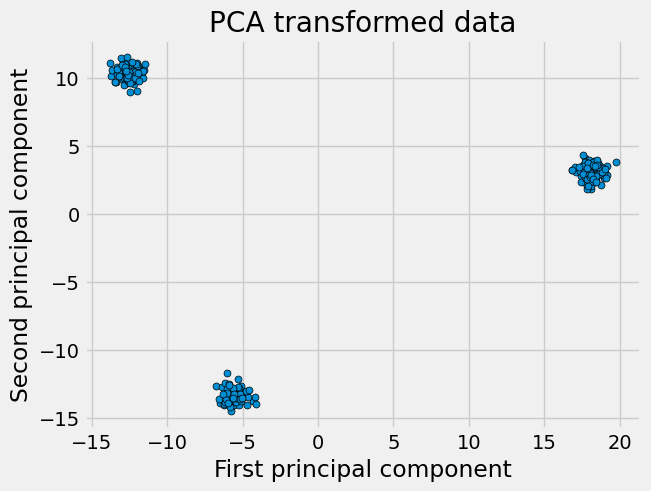

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # Used to reduce dimensionality

pca = PCA(n_components=2)

pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], marker = 'o', s = 25, edgecolors='k')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA transformed data')
plt.show()

🌐 2. t-SNE (t-distributed Stochastic Neighbor Embedding)
✔️ Como funciona:
Técnica não linear.

Preserva estruturas locais (vizinhança dos pontos).

Constrói probabilidades de proximidade entre pontos no espaço original e tenta manter isso no novo espaço.

📊 Para que serve:
Visualização de dados complexos (ex: imagens, textos, embeddings).

Muito bom para identificar clusters.

📉 Exemplo:
Usado para visualizar embeddings de palavras, imagens de dígitos, etc.

⚠️ Limitações:
Computacionalmente pesado.

Não preserva a estrutura global dos dados.

Não serve como pré-processamento para ML (só visualização).

Não é determinístico (pode mudar a cada execução).

c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, clo

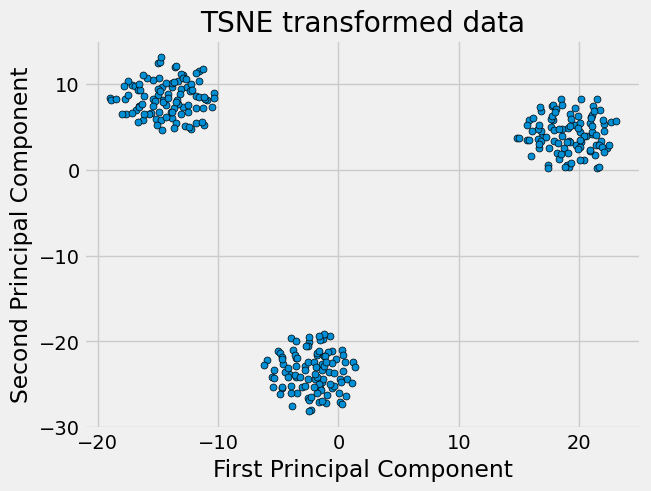

In [8]:
# Import the t-SME class from scikit-learn
from sklearn.manifold import TSNE

# Instantiate a TSNE object with 2 components
tsne = TSNE(n_components=2)

# Fit the tsne object to the data and transform
X_tsne = tsne.fit_transform(X)

# Plot the data points in the new 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker="o", s=25, edgecolor="k")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("TSNE transformed data")
plt.show()

🧮 3. SVD (Singular Value Decomposition)
✔️ Como funciona:
É uma fatoração matricial: decompõe uma matriz 
𝐴
A em 
𝑈
Σ
𝑉
𝑇
UΣV 
T
 .

É base para várias outras técnicas, inclusive PCA.

📊 Para que serve:
Compressão de dados (ex: redução de ruído em imagens).

Processamento de linguagem natural (ex: LSA/LSI em NLP).

Redução de dimensionalidade em geral.

📉 Exemplo:
Muito usado para recomendações (ex: Netflix), indexação semântica de textos.

⚠️ Limitações:
Como o PCA, é linear.

Sozinho não prioriza visualização como o t-SNE.

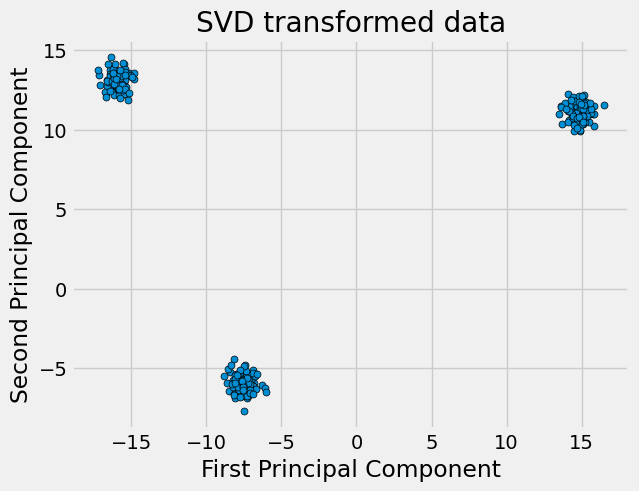

In [9]:
from sklearn.decomposition import TruncatedSVD

# Instantiate a SVD object with 2 components
svd = TruncatedSVD(n_components=2)

# Fit the svd object to the data and transform
X_svd = svd.fit_transform(X)

# Plot the data points in the new 2D space
plt.scatter(X_svd[:, 0], X_svd[:, 1], marker="o", s=25, edgecolor="k")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("SVD transformed data")
plt.show()

Aplicando KMeans para agrupar os dados

C:\Users\joaop\AppData\Local\Temp\ipykernel_30972\1466046516.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


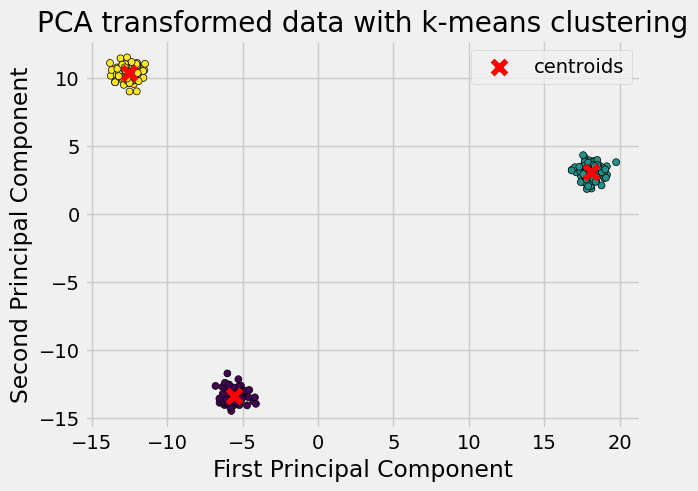

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X_pca)

labels = kmeans.labels_

plt.scatter(X_pca[:,0],X_pca[:,1],marker='o',c=labels,s=25,edgecolors='k')

plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker='x',
    s=100,
    c='r',
    edgecolors='k',
    label='centroids'
)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA transformed data with k-means clustering")
plt.legend()
plt.show()



Data splitting

Holdout Method

In [11]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 200,
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    random_state = 271828,
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 271828 # Divide o dataset em training e test sets
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 271828 # Divide o test set em validation e test sets
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (140, 2)
Validation set: (30, 2)
Test set: (30, 2)


K-fold Cross Validation

In [12]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=271828)

for i, (train_index, val_index) in enumerate(kf.split(X)):
    print(f'Fold {i+1}')
    print(f'Training set: {train_index.shape} - idx: {train_index[:5]}')
    print(f'Validation set: {val_index.shape} - idx: {val_index[:5]}')
    print()

Fold 1
Training set: (160,) - idx: [0 1 3 4 5]
Validation set: (40,) - idx: [ 2  7 10 20 32]

Fold 2
Training set: (160,) - idx: [1 2 3 5 6]
Validation set: (40,) - idx: [ 0  4 12 14 16]

Fold 3
Training set: (160,) - idx: [0 1 2 3 4]
Validation set: (40,) - idx: [13 15 22 23 27]

Fold 4
Training set: (160,) - idx: [0 2 4 5 6]
Validation set: (40,) - idx: [ 1  3 11 19 21]

Fold 5
Training set: (160,) - idx: [0 1 2 3 4]
Validation set: (40,) - idx: [ 5  6  8  9 17]

